In [5]:
import tensorflow as tf

AUTOTUNE = tf.data.experimental.AUTOTUNE

import IPython.display as display
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.datasets import load_files

import pandas as pd
import numpy as np
import keras
import h5py
tf.__version__

'1.13.1'

In [6]:
def load_dataset(path):
    data=load_files(path)
    files = np.array(data['filenames'])
    targets = np.array(data['target'])
    target_labels = np.array(data['target_names'])
    return files, targets, target_labels

In [7]:

# @hidden_cell
# The following code contains the credentials for a file in your IBM Cloud Object Storage.
# You might want to remove those credentials before you share your notebook.
credentials = {
    'IAM_SERVICE_ID': 'iam-ServiceId-0ed7a983-72c5-497b-9278-a53327ae660d',
    'IBM_API_KEY_ID': 'nvhYNTgWGdd0hvHactiYbFC9keu2ftF20umyPxWm_JyG',
    'ENDPOINT': 'https://s3.eu-geo.objectstorage.service.networklayer.com',
    'IBM_AUTH_ENDPOINT': 'https://iam.cloud.ibm.com/oidc/token',
    'BUCKET': 'myfirsthobbyproject-donotdelete-pr-ilnf4ooxlszeib',
    'FILE': 'Fruits.zip'
}


In [8]:
from ibm_botocore.client import Config
import ibm_boto3
cos = ibm_boto3.client(service_name='s3',
    ibm_api_key_id=credentials['IBM_API_KEY_ID'],
    ibm_service_instance_id=credentials['IAM_SERVICE_ID'],
    ibm_auth_endpoint=credentials['IBM_AUTH_ENDPOINT'],
    config=Config(signature_version='oauth'),
    endpoint_url=credentials['ENDPOINT'])

In [9]:
cos.download_file(Bucket=credentials['BUCKET'],Key='Fruits.zip',Filename='Fruits.zip')

In [10]:
from zipfile import ZipFile

In [11]:
with ZipFile('Fruits.zip','r') as zipObj:
    zipObj.extractall()
    


In [12]:
import os

In [13]:
labels = os.listdir("./5857_1166105_bundle_archive/fruits-360/Test")

In [14]:
X_train, y_train, target_labels = load_dataset("./5857_1166105_bundle_archive/fruits-360/Training")
                                              


In [15]:
X_test, y_test, _ = load_dataset("./5857_1166105_bundle_archive/fruits-360/Test")


In [16]:

print('Training set:', X_train.shape[0])
print('Test set:', X_test.shape[0])

Training set: 4785
Test set: 1610


In [17]:
n_class=len(np.unique(y_train))
print('number of categories: ', n_class)


number of categories:  10


In [18]:
from keras.utils import np_utils
y_train=np_utils.to_categorical(y_train, n_class)
y_test=np_utils.to_categorical(y_test, n_class)

In [19]:
from keras.preprocessing.image import array_to_img, img_to_array, load_img


In [20]:
def convert_to_array(pics):
    img_arr =[]
    for pic in pics:
        img_arr.append(img_to_array(load_img(pic)))
    return img_arr

In [21]:
X_train = np.array(convert_to_array(X_train))
X_test = np.array(convert_to_array(X_test))

In [22]:

X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

In [24]:
print('data reshaped')
print('sample shape for model input: ',X_train[0].shape)


data reshaped
sample shape for model input:  (100, 100, 3)


In [35]:
# Imports
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [36]:
# Model configuration
batch_size = 25
shape = img_width, img_height, img_num_channels = 100,100, 3
loss_function = categorical_crossentropy
no_classes = 10
no_epochs = 5
optimizer = Adam()
verbosity = 1

Instructions for updating:
Colocations handled automatically by placer.


In [37]:
# Create the model
model = Sequential()
model.add(Conv2D(16, kernel_size=(5, 5), activation='relu', input_shape=shape))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(32, kernel_size=(5, 5), activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(5,5), activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(16, activation='relu'))
model.add(Dense(no_classes, activation='softmax'))

# Display a model summary
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 96, 96, 16)        1216      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 48, 48, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 44, 44, 32)        12832     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 22, 22, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 18, 18, 64)        51264     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 9, 9, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 5184)              0         
__________

In [38]:
model.compile(loss='categorical_crossentropy',
optimizer='adam',
metrics=['accuracy'])

model.fit(X_train, y_train, batch_size=batch_size, epochs=no_epochs, verbose=1)


Instructions for updating:
Use tf.cast instead.
Epoch 1/5
4785/4785 [==============================] - 83s 17ms/sample - loss: 0.5891 - acc: 0.7918
Epoch 2/5
4785/4785 [==============================] - 113s 24ms/sample - loss: 0.0189 - acc: 0.9950
Epoch 3/5
4785/4785 [==============================] - 113s 24ms/sample - loss: 0.0017 - acc: 0.9996
Epoch 4/5
4785/4785 [==============================] - 113s 24ms/sample - loss: 3.0428e-04 - acc: 1.0000
Epoch 5/5
4785/4785 [==============================] - 113s 24ms/sample - loss: 1.6252e-04 - acc: 1.0000


In [39]:
y_pred = model.predict(X_test)


In [40]:
score=model.evaluate(X_test, y_test, verbose=0)
print('Test accuracy:', score[1])

Test accuracy: 0.9521739


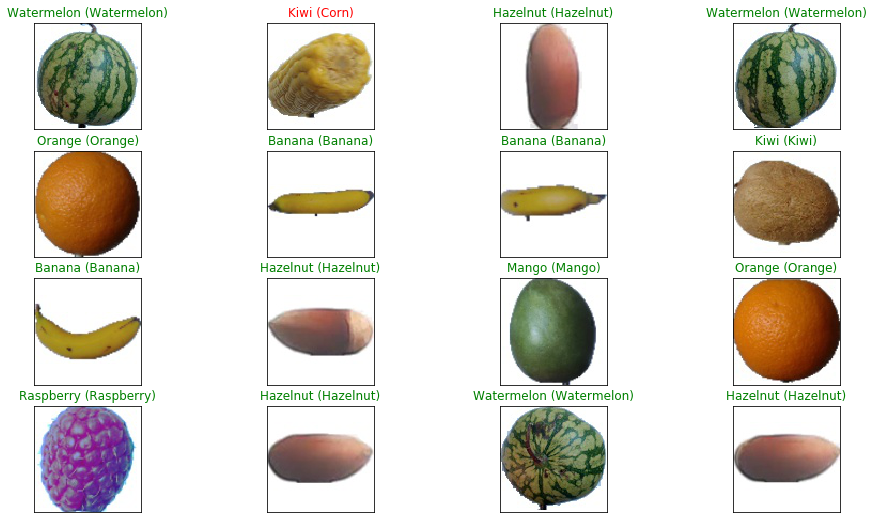

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline
# plot a random sample of test images, their predicted labels, and ground truth
fig = plt.figure(figsize=(16, 9))
for i, idx in enumerate(np.random.choice(X_test.shape[0], size=16, replace=False)):
    ax = fig.add_subplot(4, 4, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(X_test[idx]))
    pred_idx = np.argmax(y_pred[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(target_labels[pred_idx], target_labels[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))